In [ ]:
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
results = pd.read_csv(r'out/2024-12-21-erasuremagic_1e6runs_sj')

# Plot

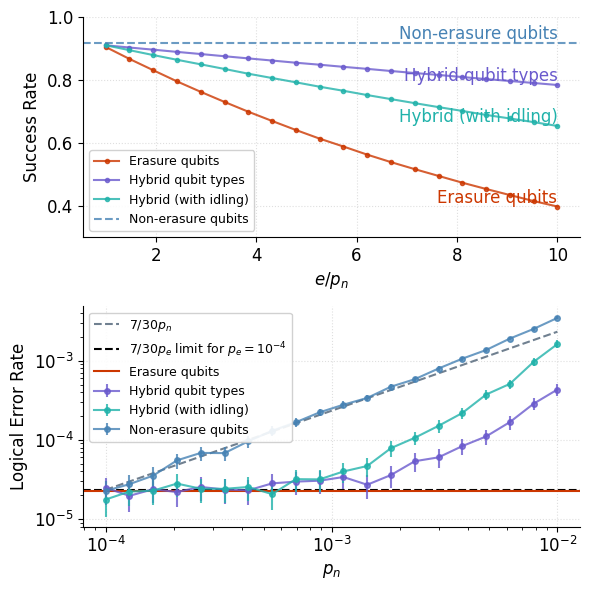

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
import matplotlib as mpl
from datetime import date
from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Sans'

label_fontsize = 12
title_fontsize = 12
legend_fontsize = 9

f_results = results[results['tag'] == 'ratio_change']


color_dict = {
    "noerasure": '#4682B4',              # Steel Blue (blueish)
    "fullerasure": '#CC3700',            # Orange Red (reddish-orangish)
    "erasuremagic": '#6A5ACD',           # Slate Blue (soft purple)
    "erasuremagic+idling": '#20B2AA',    # Light Sea Green (teal)
}

type_dict = {
    "noerasure": 'Non-erasure qubits',              # Steel Blue (blueish)
    "fullerasure": 'Erasure qubits',            # Orange Red (reddish-orangish)
    "erasuremagic": 'Hybrid qubit types',           # Slate Blue (soft purple)
    "erasuremagic+idling": 'Hybrid (with idling)', 
}

err_coef = 2.57 # 99% ,1.96 95%

ax = axes[0]
for qubit_type in f_results.qubit_type.unique():
    # Filter the DataFrame for the current value of 'qubit_type' and 'injection_type'
    df_filtered = f_results[(f_results['qubit_type'] == qubit_type)]
    ratio = df_filtered['e'] / df_filtered['p']
    
    # Add text just above the last data point
    end_x = ratio.iloc[-1]
    end_y = df_filtered['success_rate'].iloc[-1]
    ax.text(end_x, end_y, type_dict[qubit_type], fontsize=12, ha='right', va='bottom', color=color_dict[qubit_type])

    if qubit_type == 'noerasure':
        mean = df_filtered.success_rate.mean()
        ax.axhline(y=mean, color=color_dict[qubit_type], linestyle='--', label=type_dict[qubit_type], alpha=0.8)
        continue
    
    ax.plot(ratio, df_filtered['success_rate'], '.-', label=type_dict[qubit_type], color=color_dict[qubit_type], alpha=0.8)

ax.grid(which='major', alpha=0.4, linestyle=':')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0.3,1])

ax.tick_params(labelsize=label_fontsize)
ax.set_ylabel('Success Rate', fontsize=label_fontsize)
ax.set_xlabel('$e/p_n$', fontsize=label_fontsize)
# ax.legend()
# save svg
ax.legend(fontsize = legend_fontsize, framealpha = 0.9)

f_results = results[results['tag'] == 'p_change']
ax = axes[1]
d=3
# first object injection type
if f_results.injection_type.iloc[0] == 'Lao':
    LI_coef = 32 if d==3 else (11 + 30 + 10)
elif f_results.injection_type.iloc[0] == 'hook':
    LI_coef = 7 if d==3 else 8

df_filtered = f_results[(f_results['qubit_type'] == 'noerasure')]
ax.plot(df_filtered['p'], LI_coef*df_filtered['p']/30, linestyle='dashed', label='$7/30p_n$', color='slategray')
p = 1e-4
ax.axhline(LI_coef*p/30, 0, 1e5, color='black', linestyle='dashed', label=f'$7/30p_e$ limit for $p_e=10^{{-4}}$')

for qubit_type in f_results.qubit_type.unique():
    # if qubit_type == 'noerasure':
    #     mean = f_results[(f_results['qubit_type'] == qubit_type)].logical_err.mean()
    #     ax.axhline(y=mean, linestyle='-', label='All non-erasure qubits', color=color_dict[qubit_type])
    #     continue
    if qubit_type == 'fullerasure':
        mean = f_results[(f_results['qubit_type'] == qubit_type)].logical_err.mean()
        ax.axhline(y=mean, linestyle='-', label=type_dict[qubit_type], color=color_dict[qubit_type])
        continue
    # Filter the DataFrame for the current value of 'qubit_type' and 'injection_type'
    df_filtered = f_results[(f_results['qubit_type'] == qubit_type)]
    
    # ax.plot(df_filtered['p'], df_filtered['logical_err'], 'o-', label=f"{qubit_type}")

    ax.errorbar(
        df_filtered['p'], 
        df_filtered['logical_err'], 
        yerr=err_coef * df_filtered['std_err'], 
        fmt='o-', 
        markersize=4, 
        label=type_dict[qubit_type], 
        color=color_dict[qubit_type],
        alpha=0.8
    )
    

# p = 1e-3
# ax.axhline(LI_coef*p/15, 0, 1e5, color='deepskyblue', linestyle='dashed', label=f'$P_{{LI}} = {LI_coef}p/15$ for $p=10^{{-3}}$')

ax.grid(which='major', alpha=0.4, linestyle=':')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Logical Error Rate', fontsize=label_fontsize)
ax.set_xlabel('$p_n$', fontsize=label_fontsize)
ax.tick_params(labelsize=label_fontsize)
ax.loglog()
ax.legend(fontsize = legend_fontsize, framealpha = 0.9)

plt.tight_layout()
plt.savefig(f'./out/{date.today()}Erasuremagic_fig.svg', format='svg')